# Comparing Silhouette, Davies-Bouldin, Calinski-Harabasz methods

### Method for importing the image by the given image name

In [1]:
import cv2

def load_image(name):
    image = cv2.imread('../images/' + format(name) + '.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return image

### Method for resizing the image by the given height

In [2]:
import cv2

def resize_image(image, wanted_height) :
    height = image.shape[0]
    scale_percent = height / wanted_height
    width = int(image.shape[0] / scale_percent)
    dim = (width, wanted_height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    return image

### Method for image segmentation

In [35]:
import numpy as np
import cv2

def segmentation(image, k):
    pixel_values = image.reshape((-1, 1))

    pixel_values = np.float32(pixel_values)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    labels = labels.flatten()
    
    return pixel_values, labels

### Method for calculating the Silhouette score and measuring run time  (not working yet)

In [52]:
from sklearn.metrics import silhouette_score
import time

def silhouette_method(values, labels):
    '''start = time.time()
    s_score = silhouette_score(values, labels)
    end = time.time()
    s_time = end-start
    '''
    s_time = 0
    s_score = 0
    
    return s_time, s_score

 ### Method for calculating the Davies-Bouldin score and measuring run time

In [54]:
from sklearn.metrics import davies_bouldin_score
import time

def davies_bouldin_method(values, labels):
    start = time.time()
    db_score = davies_bouldin_score(values, labels)
    end = time.time()

    db_time = end-start
    
    return db_time, db_score

### Method for calculating the Calinski-Harabasz score and measuring run time

In [55]:
from sklearn.metrics import calinski_harabasz_score
import time

def calinski_harabasz_method(values, labels):
    start = time.time()
    ch_score = calinski_harabasz_score(values, labels)
    end = time.time()
    
    ch_time = end-start

    return ch_time, ch_score

### Method for plotting the results

In [47]:
from matplotlib import pyplot as plt

def plot_result(size_values, s_times, db_times, ch_times, addition):

    default_x_ticks = range(len(size_values))

    plt.title('Running times of the methods (' + addition + ')')

    plt.plot(s_times, label='Silhouette method')
    plt.plot(db_times, label='Davies-Bouldin method')
    plt.plot(ch_times, label='Calinski-Harabasz method')

    plt.xticks(default_x_ticks, size_values)

    plt.xlabel("Image size")
    plt.ylabel("Time (s)")

    plt.legend()
    plt.show()

## Calculating and plotting run times for different images and different image sizes k=2

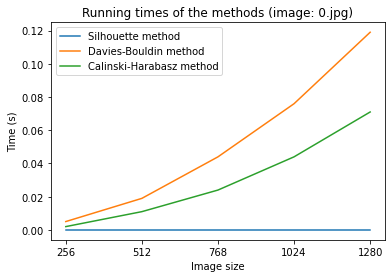

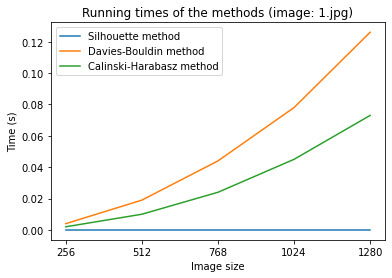

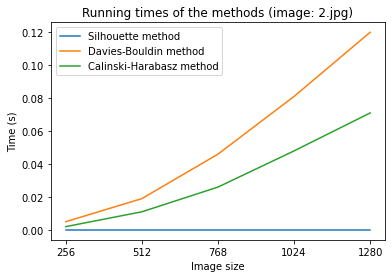

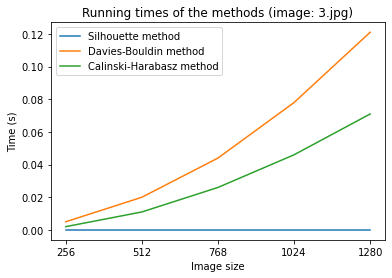

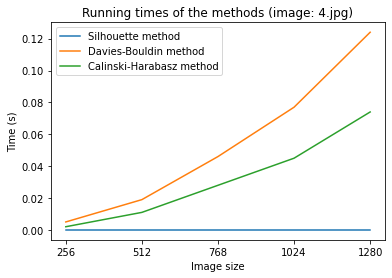

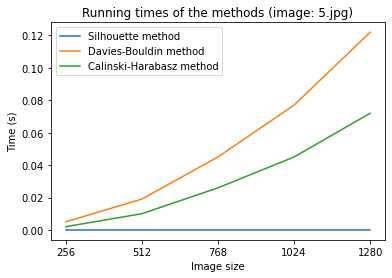

In [56]:
size_values = [256, 512, 768, 1024, 1280]

for i in range(6):
    s_times = []
    db_times = []
    ch_times = []

    image = load_image(format(i))

    for j in size_values:
        resized_image = resize_image(image, j)

        pixel_values, labels = segmentation(resized_image, 2)

        s_time, s_score = silhouette_method(pixel_values, labels)
        db_time, db_score = davies_bouldin_method(pixel_values, labels)
        ch_time, ch_score = calinski_harabasz_method(pixel_values, labels)
        
        s_times.append(s_time)
        db_times.append(db_time)
        ch_times.append(ch_time)

    addition = 'image: ' + format(i) + '.jpg'
    plot_result(size_values, s_times, db_times, ch_times, addition)

## Calculating and plotting run times for different cluster numbers and different image sizes

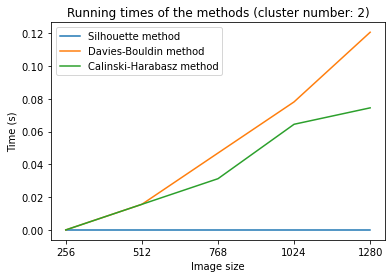

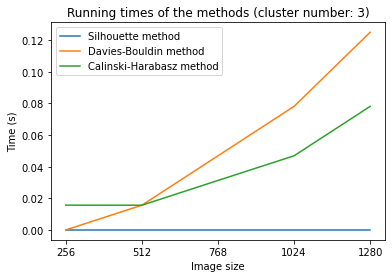

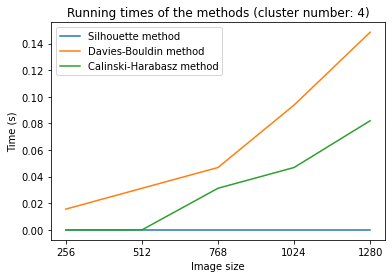

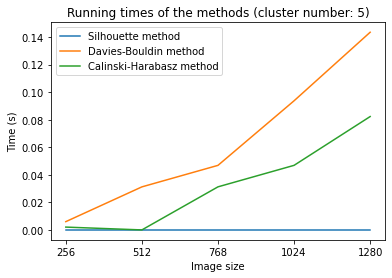

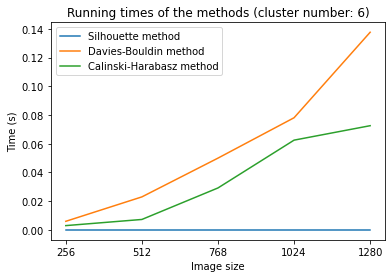

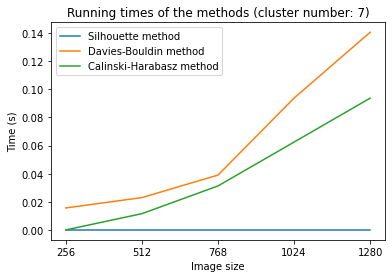

In [ ]:
size_values = [256, 512, 768, 1024, 1280]

#the best value and the cluster which resulted
s_closest = [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]
db_min = [[1000000, 2], [1000000, 2], [1000000, 2], [1000000, 2], [1000000, 2]] #TODO 
ch_max = [[0, 2], [0, 2], [0, 2], [0, 2], [0, 2]]

for i in range(2, 11):
    s_times = []
    db_times = []
    ch_times = []

    image = load_image('5')

    for j, val in enumerate(size_values):
        resized_image = resize_image(image, val)

        pixel_values, labels = segmentation(resized_image, i)
        
        s_time, s_score = silhouette_method(pixel_values, labels)
        db_time, db_score = davies_bouldin_method(pixel_values, labels)
        ch_time, ch_score = calinski_harabasz_method(pixel_values, labels)

        s_times.append(s_time)
        db_times.append(db_time)
        ch_times.append(ch_time)
        
        #print('s_score: ' + format(s_score) + ', db_score: ' + format(db_score) + ', ch_score: ' + format(ch_score))
        
        #get the best cluster number for each methods
        if((1-s_score) < (1-s_closest[j][0])):
            s_closest[j] = [s_score, i]
            
        if(db_score < db_min[j][0]):
            db_min[j] = [db_score, i]
            
        if(ch_score > ch_max[j][0]):
            ch_max[j] = [ch_score, i]
        

    addition = 'cluster number: ' + format(i)
    plot_result(size_values, s_times, db_times, ch_times, addition)

print(s_closest)
print(db_min)
print(ch_max)